In [6]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
subregions = {'r1': df.Region(p1=(-50e-9, -50e-9, 0), p2=(0, 50e-9, 10e-9)),
              'r2': df.Region(p1=(0, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))}
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), subregions=subregions)

system = mm.System(name='steps')

system.energy = mm.Zeeman(H=(0, 0, 1e6))
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.1)

Ms = 1.1e6

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

Running OOMMF (ExeOOMMFRunner) [2020/12/31 16:00]... (1.0 s)


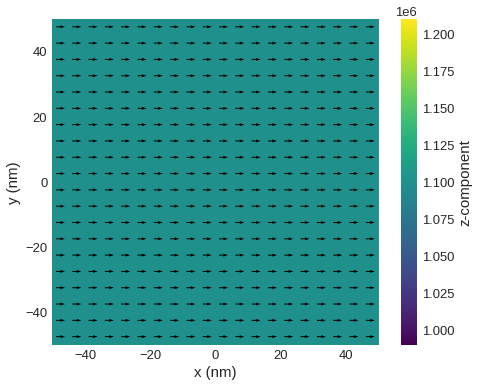

In [7]:
# minimize the energy
# td = mc.TimeDriver()
# td.drive(system, t=2e-9, n=10, dirname='./my_simulations')

md = mc.MinDriver()
md.drive(system, output_step=True)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [10]:
len(system.table.data.index)

14

In [3]:
system.m.orientation((20e-9, 0, 0))

(2.3233820147249726e-16, 0.0, 1.0)

In [4]:
system.table.mpl(yaxis=['E_zeeman'])

ValueError: Cannot plot table data with no time column.

In [ ]:
system.table.mpl(yaxis=['mz'])

In [11]:
system.table

       max_mxHxm             E       delta_E  bracket_count  line_min_count  \
0   1.000000e+06  0.000000e+00  0.000000e+00            0.0             0.0   
1   9.999996e+05 -1.206285e-19 -1.206285e-19            1.0             0.0   
2   9.848078e+05 -2.400340e-17 -2.388277e-17            2.0             0.0   
3   9.396926e+05 -4.727747e-17 -2.327407e-17            3.0             0.0   
4   8.660254e+05 -6.911504e-17 -2.183757e-17            4.0             0.0   
5   7.660444e+05 -8.885258e-17 -1.973754e-17            5.0             0.0   
6   6.427876e+05 -1.058904e-16 -1.703780e-17            6.0             0.0   
7   5.000000e+05 -1.197108e-16 -1.382038e-17            7.0             0.0   
8   3.464669e+05 -1.296684e-16 -9.957653e-18            8.0             0.0   
9   3.420201e+05 -1.298938e-16 -2.253721e-19            9.0             0.0   
10  1.981052e+05 -1.354905e-16 -5.596679e-18           10.0             0.0   
11  1.736482e+05 -1.361301e-16 -6.395896e-19        

In [ ]:
import micromagneticmodel as mm

In [ ]:
mm.__version__